In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
import pandas as pd
from sklearn import preprocessing
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv('malware_MultiClass.csv')


# keep 19 columns and remove others which are not appropriate to be included in this classification task
df=df.drop(['hash','millisecond','policy','state','cached_hole_size','free_area_cache'
             ,'mm_users','end_data','last_interval','min_flt','maj_flt','fs_excl_counter'
             ,'lock','utime','stime','gtime','cgtime'],axis=1)

display(HTML(df.head(10).to_html()))

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in df.columns:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

# encode labels
y = df['classification'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################
df['classification'] = y_encoded

# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

print('Column Datatypes:\n',df.dtypes)

#changing os from nomial to binary
df=pd.get_dummies(data=df,columns=['os'], drop_first=True)
display(HTML(df.head(10).to_html()))

#dropping classification column for clustering
df_clust = df.drop('classification', axis=1)

clust=MinMaxScaler().fit_transform(df_clust)
clust=pd.DataFrame(clust, columns=df_clust.columns)
clust.head()

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
5,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
6,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
7,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
8,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
9,malware,Mac,0,3069378560,14274,0,0,13173,0,6852,0,150,120,124,211,0,341974,0,0


ColumnName, DataType, MissingValues
classification , object , False
os , object , False
usage_counter , int64 , False
prio , int64 , False
static_prio , int64 , False
normal_prio , int64 , False
vm_pgoff , int64 , False
vm_truncate_count , int64 , False
task_size , int64 , False
map_count , int64 , False
hiwater_rss , int64 , False
total_vm , int64 , False
shared_vm , int64 , False
exec_vm , int64 , False
reserved_vm , int64 , False
nr_ptes , int64 , False
nvcsw , int64 , False
nivcsw , int64 , False
signal_nvcsw , int64 , False


,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,1,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,1,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,1,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,1,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,1,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
5,1,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
6,1,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
7,1,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
8,1,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
9,1,Mac,0,3069378560,14274,0,0,13173,0,6852,0,150,120,124,211,0,341974,0,0


Column Datatypes:
 classification        int32
os                   object
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
nvcsw                 int64
nivcsw                int64
signal_nvcsw          int64
dtype: object


,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,os_Debian,os_Mac,os_Ubuntu,os_Windows
0,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,0,0,0
1,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,0,0,1
2,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,1,0,0
3,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,0,1,0
4,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,1,0,0
5,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,0,0,1
6,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,0,1,0
7,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,1,0,0
8,1,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0,0,0,0,0
9,1,0,3069378560,14274,0,0,13173,0,6852,0,150,120,124,211,0,341974,0,0,0,1,0,0


,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,...,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,os_Debian,os_Mac,os_Ubuntu,os_Windows
0,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.16651,0.0,0.052031,...,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.16651,0.0,0.052031,...,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.16651,0.0,0.052031,...,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.16651,0.0,0.052031,...,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.16651,0.0,0.052031,...,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0


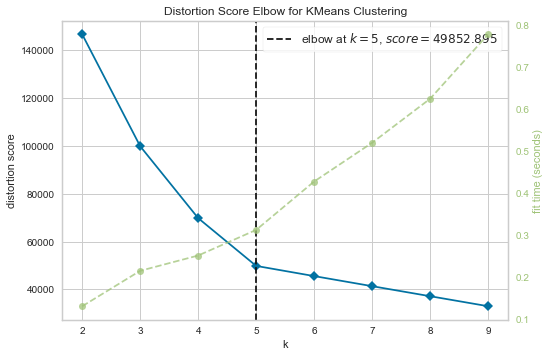

'Data:'

,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,os_Debian,os_Mac,os_Ubuntu,os_Windows,Cluster
0,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,1.0,3
2,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,1.0,0.0,2
4,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,0
5,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,1.0,3
6,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,1.0,0.0,2
7,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,0
8,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166589,0.0,0.052031,1.0,0.307692,0.250689,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,0


In [62]:
# KMeans clustering 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

km=KMeans(n_clusters=4, random_state=1,max_iter=100, algorithm='elkan')

# get the cluster labels and add it back to the original data


visualizer = KElbowVisualizer(km, k=(2,10), distance_metric='euclidean', metric='distortion')
visualizer.fit(df_kmeans)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


# try different K value and find the best K for KMeans by using Elbow method
# install a third-party library: yellowbrick
# command if you use conda: conda install -c districtdatalabs yellowbrick
# command if you use pip: pip install yellowbrick

# find the best K value
km = KMeans(n_clusters=5, random_state=42)
km = km.fit(clust)

opt=km.labels_
clust['Cluster']=opt
display('Data:',HTML(clust.head(10).to_html()))

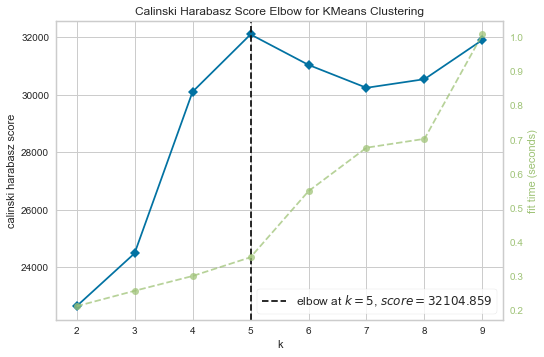

,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,os_Debian,os_Mac,os_Ubuntu,os_Windows,Cluster
0,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,4
3,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,1.0,0.0,2
4,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,4
5,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,1.0,0
6,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,1.0,0.0,2
7,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,4
8,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166510,0.0,0.052031,1.0,0.307692,0.249311,0.0,0.091519,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.18254,0.016007,0.0,0.0,0.199175,0.0,0.166589,0.0,0.052031,1.0,0.307692,0.250689,0.0,0.091519,0.0,0.0,0.0,1.0,0.0,0.0,4


In [63]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already preprocessed your data and stored it in the variable X

# Initialize a KMeans model
km = KMeans(random_state=1, max_iter=100, algorithm='elkan')

# Create a visualizer to determine the optimal number of clusters using the Silhouette score
visualizer = KElbowVisualizer(km, k=(2, 10), distance_metric='euclidean', metric='calinski_harabasz')
visualizer.fit(X)
visualizer.show()

# Based on the Silhouette score, let's choose the optimal number of clusters
optimal_k = visualizer.elbow_value_

# Apply K-Means clustering with the determined k value
km = KMeans(n_clusters=optimal_k, random_state=1)
cluster_labels = km.fit_predict(X)

# Add the cluster labels to your data
clust['Cluster'] = cluster_labels

# Display the data with cluster labels
display(HTML(clust.head(10).to_html()))

